In [108]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [109]:
dataframe = pd.read_csv("/home/eivazque/Documents/opioids.csv")
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
sorted_df = dataframe.sort_values(by=['Age'])
dataframe[(dataframe['Date'].dt.month > 10) | (dataframe['Date'].dt.month < 2)]

,Unnamed: 0,ID,Date,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,Unnamed: 38
7,7,13-0404,2013-11-10,40.0,Female,White,HAMDEN,NEW HAVEN,NaN,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN
13,14,16-0028,2016-01-13,29.0,Male,Black,NEW HAVEN,NEW HAVEN,CT,NEW HAVEN,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,Y,Accident,NaN
15,16,14-0042,2014-01-29,29.0,Female,White,CANTERBURY,NaN,NaN,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN
17,18,16-0065,2016-01-30,54.0,Male,White,MIDDLETOWN,MIDDLESEX,CT,MIDDLETOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Accident,NaN
18,19,16-0889,2016-12-20,32.0,Male,White,WINDHAM,WINDHAM,CT,WINDHAM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Accident,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5088,5089,16-0902,2016-12-26,35.0,Male,Other,FAIRFIELD,FAIRFIELD,CT,FAIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Accident,NaN
5090,5091,14-0030,2014-01-20,23.0,Female,"Hispanic, White",HARTFORD,NaN,NaN,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,MORPH PCP,NaN,NaN,Accident,NaN
5092,5093,16-0043,2016-01-21,29.0,Male,White,ELLINGTON,TOLLAND,CT,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Accident,NaN
5096,5097,17-0947,2017-12-02,28.0,Female,White,MIDDLETOWN,MIDDLESEX,CT,MIDDLETOWN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN


In [11]:
dataframe.shape

(5104, 39)

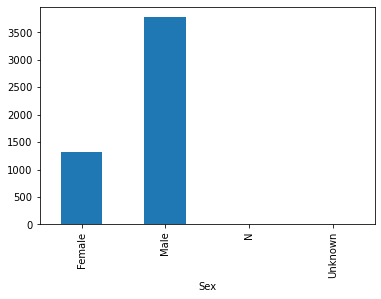

In [110]:
dataframe['AnyOpioid'] = dataframe['AnyOpioid'].fillna('N')
df = dataframe.fillna('N')
df.groupby('Sex').size().plot(kind='bar')

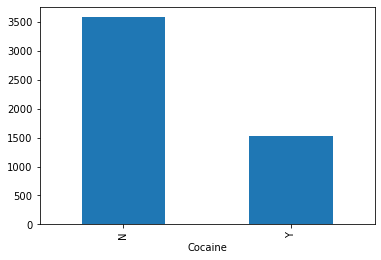

In [111]:
df.groupby('Cocaine').size().plot(kind='bar')

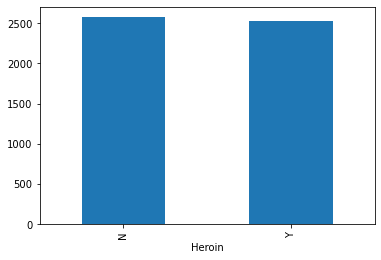

In [112]:
df.groupby('Heroin').size().plot(kind='bar')

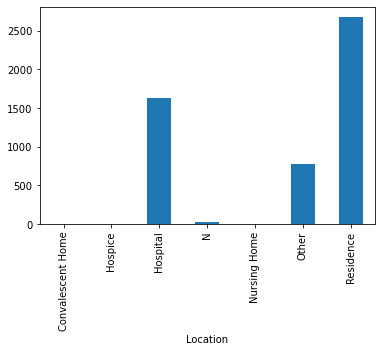

In [113]:
df.groupby('Location').size().plot(kind='bar')

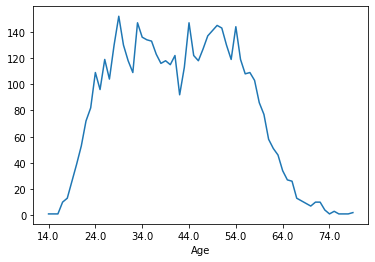

In [114]:
df.groupby('Age').size().plot()

In [115]:
row = df.iloc[[2]][['Date', 'Race', 'Sex', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone',
       'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
       'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'Other',
       'OpiateNOS', 'AnyOpioid', 'COD']]
row.columns[
    (row == 'Y').any(axis=0)
]

Index(['Cocaine', 'AnyOpioid'], dtype='object')

In [116]:
df['NumSubs'] = df.apply(lambda x: len(df.columns[x=='Y']), axis=1)

In [117]:
x = df['NumSubs'].values
y = df['Age'].values

In [118]:
x_vec = x.reshape(len(x),1)
y_vec = y.reshape(len(y))

In [119]:
y_vec = np.array([0 if asd == 'N' else asd for asd in y])
print(x_vec.shape)
print(y_vec.shape)
print(type(x_vec))
type(y_vec)

(5104, 1)
(5104,)
<class 'numpy.ndarray'>


numpy.ndarray

In [120]:
regr = LinearRegression()
regr.fit(x_vec, y_vec)
regr.score(x_vec, y_vec)

0.0010491131954981636

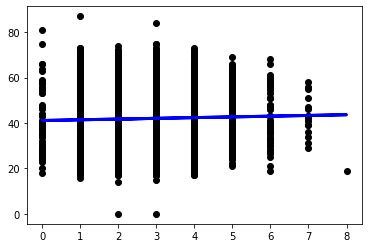

In [121]:
plt.scatter(x_vec, y_vec,  color='black')
plt.plot(x_vec, regr.predict(x_vec), color='blue', linewidth=3)

plt.show()

In [188]:
train_size = 700
x_train = x_vec[:-train_size]
x_test = x_vec[-train_size:]
y_train = y_vec[:-train_size]
y_test = y_vec[-train_size:]
print(len(x_train))
print(len(x_test))

4404
700


In [189]:
regr_train = LinearRegression()
regr_train.fit(x_train, y_train)

LinearRegression()

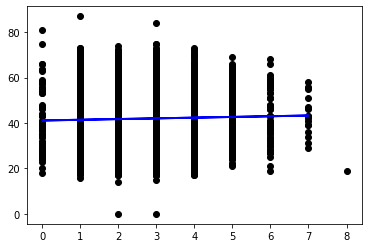

In [200]:
y_prediction = regr_train.predict(x_test)
plt.scatter(x_train, y_train, color='black')
plt.scatter(x_test, y_test, color='black')

plt.plot(x_test, y_prediction, color='blue', linewidth=2)
plt.show()

In [201]:
from sklearn.metrics import mean_squared_error, r2_score

In [192]:
r2_test = r2_score(y_test, y_prediction)
r2_test

0.0011570551109044702

In [193]:
regr_train.coef_

array([0.31170914])

In [194]:
regr_train.intercept_

41.12072056030831

In [195]:
def equation_form(elem):
    return regr_train.intercept_ + elem * regr_train.coef_[0]

In [196]:
table_map = {
    'y_value': [y for y in y_test],
    'x_value': [x for x in x_test],
    'result_equation': [equation_form(elem[0]) for elem in x_test]
}

In [197]:
compare_table = pd.DataFrame(table_map)

In [198]:
compare_table.sort_values(by='result_equation')

,y_value,x_value,result_equation
555,40.0,[0],41.120721
144,34.0,[0],41.120721
213,57.0,[0],41.120721
130,66.0,[0],41.120721
495,24.0,[0],41.120721
...,...,...,...
279,30.0,[6],42.990975
382,38.0,[6],42.990975
529,39.0,[6],42.990975
639,39.0,[7],43.302685


In [210]:
lst =  df[10:21]
lst[['Date', 'Race', 'Sex', 'AnyOpioid', 'COD']]

,Date,Race,Sex,AnyOpioid,COD
10,2012-08-23 00:00:00,"Hispanic, White",Female,N,Multiple Drug Toxicity
11,2015-07-05 00:00:00,White,Female,Y,Acute intoxication from the combined effects o...
12,2015-05-14 00:00:00,White,Male,Y,Heroin Intoxication
13,2016-01-13 00:00:00,Black,Male,Y,Acute Heroin Intoxication in a Person Taking C...
14,2013-08-19 00:00:00,White,Male,N,Methadone Intoxication
15,2014-01-29 00:00:00,White,Female,N,Acute intoxication due to the combined effects...
16,2012-03-02 00:00:00,White,Male,N,Ethanol and Oxymorphone Toxicity
17,2016-01-30 00:00:00,White,Male,Y,"Acute Heroin Intoxication While Using Alcohol,..."
18,2016-12-20 00:00:00,White,Male,Y,Acute Intoxication due to the Combined Effects...
19,2014-11-14 00:00:00,White,Male,N,Acute intoxication due to the combined effects...


In [221]:
for index in range(len(lst)):
    row = lst.iloc[[index]][['Date', 'Race', 'Sex', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone',
       'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
       'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'Other',
       'OpiateNOS', 'AnyOpioid', 'COD']]
    print(row.columns[
        (row == 'Y').any(axis=0)
    ])
    


Index(['Cocaine'], dtype='object')
Index(['Methadone', 'AnyOpioid'], dtype='object')
Index(['AnyOpioid'], dtype='object')
Index(['Benzodiazepine', 'Amphet', 'AnyOpioid'], dtype='object')
Index(['Methadone'], dtype='object')
Index(['Benzodiazepine'], dtype='object')
Index(['Oxymorphone', 'Ethanol'], dtype='object')
Index(['Ethanol', 'AnyOpioid'], dtype='object')
Index(['Fentanyl', 'Benzodiazepine', 'AnyOpioid'], dtype='object')
Index(['Ethanol'], dtype='object')
Index(['Methadone', 'AnyOpioid'], dtype='object')


In [247]:
for index in range(len(lst)):
    row = lst.iloc[[index]][['Date', 'Race', 'Sex','AnyOpioid']]
    print(f'"date": "{row["Date"].values.astype(str)[0]}"", "race": "{row["Race"].values[0]}", "sex": "{row["Sex"].values[0]}", "any_opioid": true')

"date": "2012-08-23 00:00:00"", "race": "Hispanic, White", "sex": "Female", "any_opioid": true
"date": "2015-07-05 00:00:00"", "race": "White", "sex": "Female", "any_opioid": true
"date": "2015-05-14 00:00:00"", "race": "White", "sex": "Male", "any_opioid": true
"date": "2016-01-13 00:00:00"", "race": "Black", "sex": "Male", "any_opioid": true
"date": "2013-08-19 00:00:00"", "race": "White", "sex": "Male", "any_opioid": true
"date": "2014-01-29 00:00:00"", "race": "White", "sex": "Female", "any_opioid": true
"date": "2012-03-02 00:00:00"", "race": "White", "sex": "Male", "any_opioid": true
"date": "2016-01-30 00:00:00"", "race": "White", "sex": "Male", "any_opioid": true
"date": "2016-12-20 00:00:00"", "race": "White", "sex": "Male", "any_opioid": true
"date": "2014-11-14 00:00:00"", "race": "White", "sex": "Male", "any_opioid": true
"date": "2015-06-02 00:00:00"", "race": "White", "sex": "Female", "any_opioid": true
